<a href="https://colab.research.google.com/github/sebdavid3/Data-Structures-2/blob/main/Particulas_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fabian Miranda NRC(2151)

Sebastian David Ibañez NRC (2152)

In [ ]:
''' crear clase cuerpo celeste, debe tener masa, posicion en x inicial, posicion en y inicial,
velocidad en x inicial, velocidad en y inicial, aceleracion en x, aceleracion en y, posicion en x, posicion en y,
color

la fuerza de dos cuerpos celestes se calcula
con la formula F = G * (m1 * m2) / r^2 donde G es la constante de gravitacion universal
m es la masa de los cuerpos celestes y r es el radio entre los cuerpos celestes

la aceleracion de un cuerpo celeste se calcula con la formula a = F / m
la fuerza tiene una direccion y sentido, por lo que se debe calcular la fuerza en x y en y
para calcular la fuerza en x utilizamos Fx = F * (delta x / r)
para calcular la fuerza en y utilizamos Fy = F * (delta y / r)
para calcular velocidad en x utilizamos Vf = vi + F/m * delta t
para calcular la posicion en x utilizamos Pf = Pi + Vf * delta t

constante UA = 149597870.7
constante G = 6.674 * 10^-11
Escala 100 pixeles = 250/ 1 UA
masa del sol = 1.989 * 10^30 kg
masa de la tierra = 5.972 * 10^24 kg
velocidad de la tierra = 29.78 km/s


Dist2Sun(posy)     posx        velx	   Vely        mass	     Celestial Body
1.4960e+11  	   0.0000e+00  0.0000e+00  2.9800e+04  5.9740e+24    earth
2.2790e+11  	   0.0000e+00  0.0000e+00  2.4100e+04  6.4190e+23    mars-
5.7900e+10  	   0.0000e+00  0.0000e+00  4.7900e+04  3.3020e+23    mercury
0.0000e+00  	   0.0000e+00  0.0000e+00  0.0000e+00  1.9890e+30    sun
1.0820e+11  	   0.0000e+00  0.0000e+00  3.5000e+04  4.8690e+24    venus  '''

' crear clase cuerpo celeste, debe tener masa, posicion en x inicial, posicion en y inicial,\nvelocidad en x inicial, velocidad en y inicial, aceleracion en x, aceleracion en y, posicion en x, posicion en y,\ncolor\n\nla fuerza de dos cuerpos celestes se calcula\ncon la formula F = G * (m1 * m2) / r^2 donde G es la constante de gravitacion universal\nm es la masa de los cuerpos celestes y r es el radio entre los cuerpos celestes\n\nla aceleracion de un cuerpo celeste se calcula con la formula a = F / m\nla fuerza tiene una direccion y sentido, por lo que se debe calcular la fuerza en x y en y\npara calcular la fuerza en x utilizamos Fx = F * (delta x / r)\npara calcular la fuerza en y utilizamos Fy = F * (delta y / r)\npara calcular velocidad en x utilizamos Vf = vi + F/m * delta t\npara calcular la posicion en x utilizamos Pf = Pi + Vf * delta t\n\nconstante UA = 149597870.7\nconstante G = 6.674 * 10^-11\nEscala 100 pixeles = 250/ 1 UA\nmasa del sol = 1.989 * 10^30 kg\nmasa de la tier

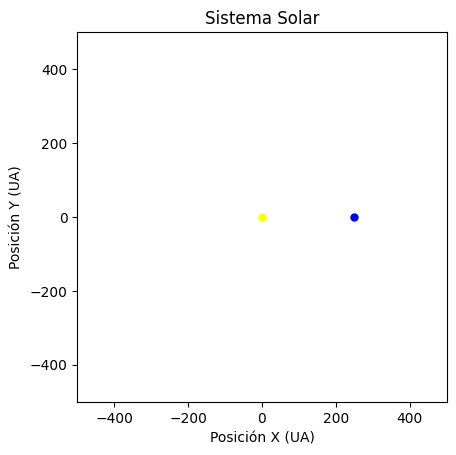

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Definición de la clase CuerpoCeleste
class CuerpoCeleste:
    def __init__(self, masa, pos_x, pos_y, vel_x, vel_y, color):
        self.masa = masa
        self.pos_x = pos_x
        self.pos_y = pos_y
        self.vel_x = vel_x
        self.vel_y = vel_y
        self.acel_x = 0
        self.acel_y = 0
        self.color = color

    def actualizar_aceleracion(self, otros_cuerpos):
        G = 6.674 * 10**-11  # Constante de gravitación universal
        self.acel_x = 0
        self.acel_y = 0
        for otro in otros_cuerpos:
            if otro != self:
                delta_x = otro.pos_x - self.pos_x
                delta_y = otro.pos_y - self.pos_y
                r = np.sqrt(delta_x**2 + delta_y**2)
                epsilon = 1e-10  # Evitar división por cero
                F = G * self.masa * otro.masa / (r**2 + epsilon)
                self.acel_x += F * delta_x / r / self.masa
                self.acel_y += F * delta_y / r / self.masa

    def actualizar_velocidad(self, delta_t):
        self.vel_x += self.acel_x * delta_t
        self.vel_y += self.acel_y * delta_t

    def actualizar_posicion(self, delta_t):
        self.pos_x += self.vel_x * delta_t
        self.pos_y += self.vel_y * delta_t

def emular_movimiento(tiempo_total, delta_t):
    UA = 149597870.7 * 1000
    escala = 250 / UA
    sol = CuerpoCeleste(1.989 * 10**30, 0, 0, 0, 0, 'yellow')
    tierra = CuerpoCeleste(5.972 * 10**24, UA, 0, 0, 29780, 'blue')
    cuerpos = [sol, tierra]

    fig, ax = plt.subplots()
    ax.set_xlim(-2 * UA * escala, 2 * UA * escala)
    ax.set_ylim(-2 * UA * escala, 2 * UA * escala)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('Posición X (UA)')
    ax.set_ylabel('Posición Y (UA)')
    ax.set_title('Sistema Solar')
    plots = {}
    for cuerpo in cuerpos:
        plots[cuerpo] = ax.plot([], [], 'o', color=cuerpo.color, markersize=5)[0]

    # Emulacion del movimiento
    for _ in range(int(tiempo_total / delta_t)):
        for cuerpo in cuerpos:
            cuerpo.actualizar_aceleracion(cuerpos)
        for cuerpo in cuerpos:
            cuerpo.actualizar_velocidad(delta_t)
            cuerpo.actualizar_posicion(delta_t)
        for cuerpo in cuerpos:
            plots[cuerpo].set_data([cuerpo.pos_x * escala], [cuerpo.pos_y * escala])

        clear_output(wait=True)
        display(fig)
        plt.pause(0.0001)

    plt.show()

emular_movimiento(365 * 24 * 3600, 24 * 3600)
